In [0]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm

In [0]:
import urllib.request
urllib.request.urlretrieve ("https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz", "a.tar.gz")
import tarfile
tar = tarfile.open("a.tar.gz")
tar.extractall()
tar.close()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


def unpickle(file):
 '''Load byte data from file'''
 with open(file, 'rb') as f:
  data = pickle.load(f, encoding='latin-1')
  return data


def load_cifar10_data(data_dir):
 '''Return train_data, train_labels, test_data, test_labels
 The shape of data is 32 x 32 x3'''
 train_data = None
 train_labels = []

 for i in range(1, 6):
  data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
  if i == 1:
   train_data = data_dic['data']
  else:
   train_data = np.vstack((train_data, data_dic['data']))
  train_labels += data_dic['labels']

 test_data_dic = unpickle(data_dir + "/test_batch")
 test_data = test_data_dic['data']
 test_labels = test_data_dic['labels']

 train_data = train_data.reshape((len(train_data), 3, 32, 32))
 train_data = np.rollaxis(train_data, 1, 4)
 train_labels = np.array(train_labels)

 test_data = test_data.reshape((len(test_data), 3, 32, 32))
 test_data = np.rollaxis(test_data, 1, 4)
 test_labels = np.array(test_labels)

 return train_data, train_labels, test_data, test_labels

data_dir = 'cifar-10-batches-py'

train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)


(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [0]:

x_train = train_data.reshape(train_data.shape[0],-1)
x_test = test_data.reshape(test_data.shape[0], -1)

In [0]:
y_train = train_labels
y_test = test_labels

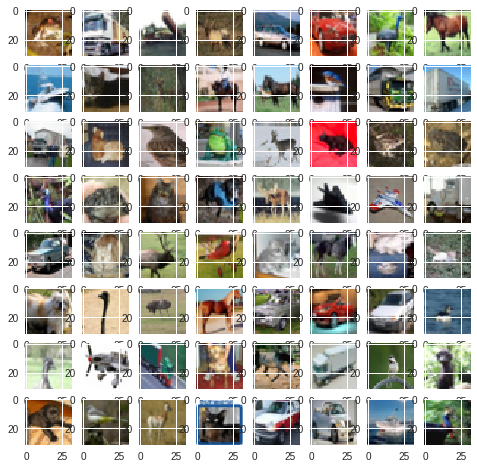

In [0]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(train_data[i])
plt.show()

In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_transformed = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
pca = PCA()
pca.fit(x_transformed)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
total = pca.explained_variance_.sum()
current = 0
k=0
while(current/total < 0.95):
  current+= pca.explained_variance_[k]
  k=k+1
k

221

In [0]:
pca = PCA(n_components = k,whiten=True)
x_final_train = pca.fit_transform(x_transformed)
x_final_test = pca.transform(x_test)

In [0]:
svc = svm.SVC(C= 100, gamma=0.005)

In [0]:
svc.fit(x_final_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred_svm = svc.predict(x_final_test)
svc_score = accuracy_score(y_test, y_pred_svm)
svc_score

0.5676